In [1]:
import os

import torch
import numpy as np
import datasets
import pandas as pd
import random
#import umap
import sys
import evaluate
import json
import seaborn as sns
import re
import nltk
import sqlite3
from tabulate import tabulate
from pathlib import Path
from itertools import product
from IPython.core.debugger import set_trace
from datasets import Dataset, DatasetDict, concatenate_datasets
from torch import nn
from nltk import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from IPython.core.debugger import Pdb, set_trace
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
from transformers import AutoModel, AutoTokenizer
from tqdm.notebook import tqdm
#from tqdm import tqdm
from numpy.lib.stride_tricks import sliding_window_view
from pprint import pprint
from scipy.cluster.hierarchy import linkage
from collections import OrderedDict

from nbtools.utils import files, strings

datasets.disable_caching()

cache_dir = '/data/john/cache'
proot = files.project_root()

# Set this to whatever you want
seed = 10

torch.manual_seed(seed)
np.random.seed(seed)

%load_ext autoreload
%autoreload 2
%matplotlib inline
import os
os.environ['CUDA_VISIBLE_DEVICES']='3'

import torch
import numpy as np
import datasets
import pandas as pd
import random
#import umap
import sys
import evaluate
import json
import seaborn as sns
import re
import nltk
import sqlite3
from tabulate import tabulate
from pathlib import Path
from itertools import product
from IPython.core.debugger import set_trace
from datasets import Dataset, DatasetDict, concatenate_datasets
from torch import nn
from nltk import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from IPython.core.debugger import Pdb, set_trace
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
from transformers import AutoModel, AutoTokenizer
from tqdm.notebook import tqdm
#from tqdm import tqdm
from numpy.lib.stride_tricks import sliding_window_view
from pprint import pprint
from scipy.cluster.hierarchy import linkage
from collections import OrderedDict

from nbtools.utils import files, strings

datasets.disable_caching()

cache_dir = '/data/john/cache'
proot = files.project_root()

# Set this to whatever you want
seed = 10

torch.manual_seed(seed)
np.random.seed(seed)

%load_ext autoreload
%autoreload 2
%matplotlib inline



2025-04-12 07:00:59.415132: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744459259.511739  369873 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744459259.540549  369873 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-12 07:00:59.774538: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Make graph for $-\log(p)$

/tmp/ipykernel_369873/4268119926.py:15: RuntimeWarning: divide by zero encountered in log
  ax[1].plot(x, -np.log(1-x))


Text(0, 0.5, '$-\\log(1-p)$')

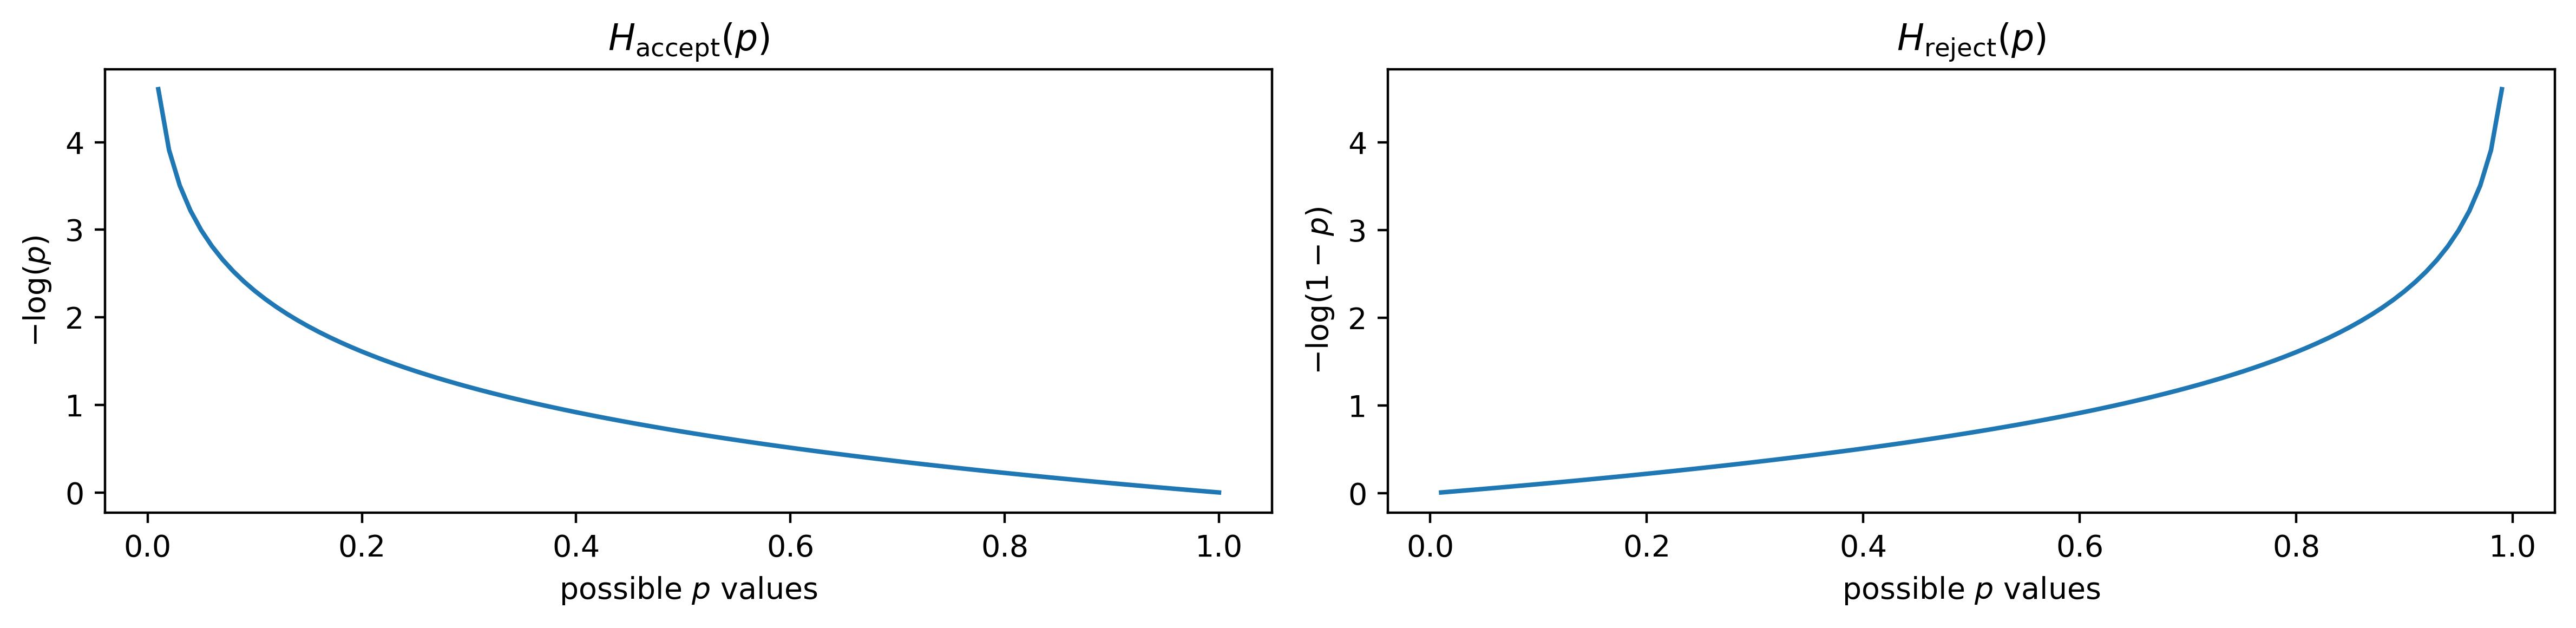

In [19]:
x = np.linspace(0.01, 1, 100)

fig, ax = plt.subplots(
    nrows=1, ncols=2,
    figsize=(12, 3), 
    dpi=400,
    layout='tight',
)
ax[0].plot(x, -np.log(x))
ax[0].set_title(r'$H_{\text{accept}}(p)$')
ax[0].set_xlabel(r'possible $p$ values')
ax[0].set_ylabel(r'$-\log(p)$')


ax[1].plot(x, -np.log(1-x))
ax[1].set_title(r'$H_{\text{reject}}(p)$')
ax[1].set_xlabel(r'possible $p$ values')
ax[1].set_ylabel(r'$-\log(1-p)$')